Este colab fue desarrollado por Arnold Charry Armero

# James Beerd

James Beerd hornea tartas de queso y pasteles de la Selva Negra.
Durante cualquier mes, puede hornear como máximo 65 pasteles. Los costos
por pastel y las demandas de pasteles, que deben cumplirse en
tiempo, se enumeran en la Tabla 33. Cuesta 50¢ sostener una tarta de queso,
y 40 centavos para mantener un pastel de la Selva Negra, en inventario por un
mes. Formule un LP para minimizar el costo total de
satisfacer las demandas de los próximos tres meses.

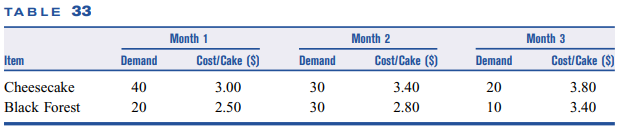

## Conjuntos

$ t = \text{Periodo indexado por }t$

$ j = \text{Producto indexado por }j$




## Parámetros

$ CP_{tj} = \textrm{Costo de producir en el periodo } t \textrm{ del producto } j$

$ CL_{tj} = \textrm{Costo de mantener en inventario en el periodo } t \textrm{ del producto } j $

$ D_{tj} = \textrm{Demanda en el periodo } t \textrm{ del producto } j$

$ W_{t} = \textrm{Capacidad máxima de producción en el tiempo regular en el periodo } t $

## Variables de decisión

$ x_{tj} = \textrm{unidades a producir en el periodo } t \textrm{ del producto } j $

$ I_{tj} = \textrm{unidades a mantener en inventario en el periodo } t \textrm{ del producto } j$

## Función objetivo

$$ \textrm{Min } z = \sum_{j = 1}^{n} \sum_{t = 1}^{n}x_{tj} CP_{tj} + \sum_{j = 1}^{n} \sum_{t = 1}^{n}I_{tj}CL_{tj} $$

## Restricciones

Se debe satisfacer la demanda en cada periodo $t$

$$ I_{tj} = I_{tj-1} + x_{tj} - D_{tj}, \forall t, \forall j $$

In [1]:
#Se instala la libreria
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 19.6 MB/s eta 0:00:00


In [2]:
#Se importa la libreria
from pulp import *

In [5]:
#Conjuntos
periodos = range(4)
productos = range(2)

In [4]:
#Parámetros

D = [[40, 20], [30, 30], [20, 10]]

CP = [[3, 2.5], [3.4, 2.8], [3.8, 3.4]]

CL = [[0.5, 0.4], [0.5, 0.4], [0.5, 0.4]]

W = [65, 65, 65]

In [11]:
#Se crea la instancia del modelo
model = LpProblem(name = "Inventory_Company", sense = LpMinimize)

#Inicialización de las variables de decisión
X = LpVariable.dicts("X", (periodos, productos), 0, None, LpInteger)
I = LpVariable.dicts("I", (periodos, productos), 0, None, LpInteger)


#Se agrega la función objetivo
model += lpSum([[X[t][j] * CP[t-1][j-1] + I[t][j] * CL[t-1][j-1] for t in range(1, 4)] for j in productos])

#Restricciones

#Debe haber un inventario inicial
model += I[0][0] == 0
model += I[0][1] == 0
model += X[0][0] == 0
model += X[0][1] == 0

#Tiene que satisfacerse el inventario
for t in range(1, 4):
  for j in productos:
    model += I[t-1][j] + X[t][j] - D[t-1][j] == I[t][j]

#Capacidad máxima de producción
for t in range(1, 4):
    model += lpSum(X[t][j] for j in productos) <= W[j]


#Se resuelve el modelo
model.solve()

#Se imprime el status del problema
print("Status", LpStatus[model.status])

#Se imprimen las variables
for v in model.variables():
  print(v.name, "=", v.varValue)

#Se imprime la función objetivo
print("Costo total = $", value(model.objective))

Status Optimal
I_0_0 = 0.0
I_0_1 = 0.0
I_1_0 = 5.0
I_1_1 = 0.0
I_2_0 = 10.0
I_2_1 = 0.0
I_3_0 = 0.0
I_3_1 = 0.0
X_0_0 = 0.0
X_0_1 = 0.0
X_1_0 = 45.0
X_1_1 = 20.0
X_2_0 = 35.0
X_2_1 = 30.0
X_3_0 = 10.0
X_3_1 = 10.0
Costo total = $ 450.5


In [13]:
model

Inventory_Company:
MINIMIZE
0.4*I_1_0 + 0.5*I_1_1 + 0.4*I_2_0 + 0.5*I_2_1 + 0.4*I_3_0 + 0.5*I_3_1 + 2.5*X_1_0 + 3*X_1_1 + 2.8*X_2_0 + 3.4*X_2_1 + 3.4*X_3_0 + 3.8*X_3_1 + 0.0
SUBJECT TO
_C1: I_0_0 = 0

_C2: I_0_1 = 0

_C3: X_0_0 = 0

_C4: X_0_1 = 0

_C5: I_0_0 - I_1_0 + X_1_0 = 40

_C6: I_0_1 - I_1_1 + X_1_1 = 20

_C7: I_1_0 - I_2_0 + X_2_0 = 30

_C8: I_1_1 - I_2_1 + X_2_1 = 30

_C9: I_2_0 - I_3_0 + X_3_0 = 20

_C10: I_2_1 - I_3_1 + X_3_1 = 10

_C11: X_1_0 + X_1_1 <= 65

_C12: X_2_0 + X_2_1 <= 65

_C13: X_3_0 + X_3_1 <= 65

VARIABLES
0 <= I_0_0 Integer
0 <= I_0_1 Integer
0 <= I_1_0 Integer
0 <= I_1_1 Integer
0 <= I_2_0 Integer
0 <= I_2_1 Integer
0 <= I_3_0 Integer
0 <= I_3_1 Integer
0 <= X_0_0 Integer
0 <= X_0_1 Integer
0 <= X_1_0 Integer
0 <= X_1_1 Integer
0 <= X_2_0 Integer
0 <= X_2_1 Integer
0 <= X_3_0 Integer
0 <= X_3_1 Integer